# Interactive Widgets

- We are building a simple UI for basic image manipulation 
- We are using [scikit-image](http://scikit-image.org/).

In [17]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display
import matplotlib.pyplot as plt

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import skimage
from skimage import data, io, filters

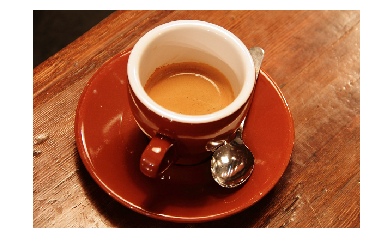

In [47]:
i = data.coffee()
plt.axis('off')
plt.imshow(i)

In [48]:
def edit_image(image, sigma=0.1, r=1.0, g=1.0, b=1.0):
    new_image = filters.gaussian(image, sigma=sigma, multichannel=True)
    new_image[:,:,0] = r*new_image[:,:,0]
    new_image[:,:,1] = g*new_image[:,:,1]
    new_image[:,:,2] = b*new_image[:,:,2]
    plt.axis('off')
    plt.imshow(new_image)
    return new_image

In [49]:
lims = (0.0,1.0,0.01)
w = interactive(edit_image, image=fixed(i), sigma=(0.0,10.0,0.1), r=lims, g=lims, b=lims)
display(w)

interactive(children=(FloatSlider(value=0.1, description='sigma', max=10.0), FloatSlider(value=1.0, descriptio…

(-0.5, 599.5, 399.5, -0.5)

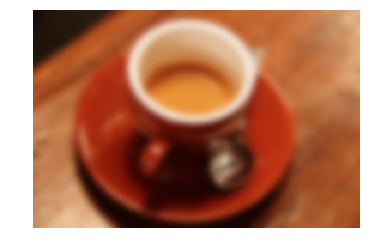

In [51]:
plt.imshow(w.result)
plt.axis('off')

## Python 3 only: Function annotations

In Python 3, you can use the new function annotation syntax to describe widgets for interact:

In [56]:
lims = (0.0,1.0,0.01)

@interact
def edit_image(image: fixed(i), sigma:(0.0,10.0,0.1)=0.1, r:lims=1.0, g:lims=1.0, b:lims=1.0):
    new_image = filters.gaussian(image, sigma=sigma, multichannel=True)
    new_image[:,:,0] = r*new_image[:,:,0]
    new_image[:,:,1] = g*new_image[:,:,1]
    new_image[:,:,2] = b*new_image[:,:,2]
    plt.imshow(new_image)
    plt.axis('off')
    #return new_image

interactive(children=(FloatSlider(value=0.1, description='sigma', max=10.0), FloatSlider(value=1.0, descriptio…

# Lorenz Attractor

Consider the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

It exhibits a range of different behaviors with ($\sigma$, $\beta$, $\rho$)

## Imports

In [57]:
%matplotlib inline
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt

# For 3D plotting
from mpl_toolkits.mplot3d.axes3d import Axes3D

## Computing and plotting the result

- We define a function to integrate the differential equations
- Parameters: ($\sigma$, $\beta$, $\rho$), numerical integration (`N`, `max_time`), and the visualization (`angle`).

In [58]:
def solve_lorenz(N=10, angle=25.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    #ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorentz system."""
        x,y,z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

Using IPython's `interactive` function, we can explore how the trajectories behave as we change the various parameters.

In [59]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=25.0, description='angle…

The object returned by `interactive` is a `Widget` object and it has attributes that contain the current result and arguments:

In [60]:
w.kwargs

{'N': 7,
 'angle': 59.7,
 'beta': 2.6666666666666665,
 'max_time': 4.0,
 'rho': 28.0,
 'sigma': 8.3}

# Ready to play?

## String sorting

Write a `sort_string` function that takes a string as its input and prints a new string consisting of the original one, sorted.  Add a `reverse` keyword argument with a default of `False` to allow for the sorting to be done in reverse.

Then, use `interact` to create a user interface for exploring your `sort_string` function.

In [12]:
%load solutions/string_sorting.py

In [ ]:
from IPython.html.widgets import TextWidget
@interact
def sort_string(s:TextWidget() , reverse=False):
    s = reversed(sorted(s)) if reverse else sorted(s)
    print (''.join(s))


## Plotting with parameters

Write a `plot_sin` function that plots $sin(ax+b)$ over the interval $[0,4\pi]$.

Then use `interact` to create a user interface for exploring your function:

* `a` should be a floating point number over the interval $[0.0,5.0]$.
* `b` should be a floating point number over the interval $[-5.0,5.0]$.

In [ ]:
%load solutions/param_plot.py

In [62]:
def plot_sin(a, b):
    x = np.linspace(0,4*np.pi, 100)
    y = np.sin(a*x+b)
    plt.plot(x,y)

interact(plot_sin, a=(0.0,5.0,0.1), b=(-5.0,5.0,0.1));

interactive(children=(FloatSlider(value=2.5, description='a', max=5.0), FloatSlider(value=0.0, description='b'…

## Simple data explorer

In this exercise, you will use interact to build a UI for exploring correlations between different features in the [Iris dataset](http://en.wikipedia.org/wiki/Iris_flower_data_set) in [sklearn](http://scikit-learn.org/stable/(http://scikit-learn.org/stable/). This data contains 4 different measurements (called features in this content) of 150 different iris flowers of three different species.

In [63]:
# Load the dataset

from sklearn.datasets import load_iris
iris_data = load_iris()

The actual data is stored as a NumPy array under the `data` attribute:

In [64]:
iris_data.data.shape

(150, 4)

You can see the meanings of the 4 columns of data by looking at the `feature_names` attribute:

In [65]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Write a `plot_iris` function that creates a scatter plot (using `plt.scatter`) of two columns of this dataset. Your function should have the following signature:

```python
def plot_iris(a, col1, col2):
    ...
```

where `a` is the NumPy array of data and `col1/col2` are the two columns to use for the scatter plot.

Use `interact` to build a UI to explore the iris dataset using your `plot_iris` function. You will need to use the `fixed` function when passing the dataset to the function.

In [67]:
# %load solutions/data_explorer.py
def plot_iris(a=None, col1=0, col2=0):
    plt.scatter(a[:,col1], a[:,col2])

interact(plot_iris, a=fixed(iris_data.data), col1=(0,3), col2=(0,3));

interactive(children=(IntSlider(value=0, description='col1', max=3), IntSlider(value=0, description='col2', ma…